# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Load the Data

In [136]:
# Importing necessary libraries
import pandas as pd # For data manipulation and analysis
import warnings # To manage warning messages
import matplotlib.pyplot as plt # For creating visualizations
from matplotlib.ticker import FuncFormatter # For custom axis formatting

# Define a formatter function to add thousand separators to integers on plots
integer_thousand_separator_formatter = FuncFormatter(lambda x, _:f'{int(x):,}')

# Suppress all warning messages to keep the output clean
warnings.filterwarnings('ignore')

# Configure pandas to display all columns and rows when printing DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [137]:
# Load transaction data from an Excel file into a pandas DataFrame
df_transactions = pd.read_excel('Online Retail.xlsx')

# Display the first five rows of the DataFrame to get a quick overview of the data
df_transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [138]:
# I will use an exterlal generative AI tool to to assist with exploring and analyzing the dataset
# Since the original dataset contains over 500,000 rows, it's too large for the tool to handle efficiently.
# To make the dataset more manageable, I will create a smaller sample with 5,000 rows.

# Randomly select 5,000 rows from the full dataset to create a representative sample
# The 'random_state' parameter ensures reproducibility of the sample
df_sample = df_transactions.sample(n=5000, random_state=42)

# Save the samples dataset to a new Excel file for use with the external AI tool
# 'index=False' prevents pandas from writing row indices into the Excel file
df_sample.to_excel("Online Retail Sample 5000 Raw.xlsx", index=False)

## Data Cleaning #####
Begin by cleaning the dataset - this includes handling any missing values and removing unnecessary or duplicate rows or columns to ensure the data is accurate and ready for analysis.

In [139]:
df_transactions.info()

# Two columns missing values:
# - Description
# - CustomerID

# Since we don't have detailed documentation for this dataset, we lack context about the meaning and origin of these missing values.
# Therefore, we need to investigate the nature and patterns of the missing data
# Based on our findings, we can make informed assumptions and choose an appropriate strategy to handle them effectively.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [140]:
# Let's start by examining the rows where the 'Description' field is missing.
# This will help us understand the context of these null values and whether they follow any patterns.
df_null_description = df_transactions[df_transactions["Description"].isnull()]
df_null_description.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom


In [141]:
# Further investigation revealed the following insights:

# - There are 1,454 rows where the 'Description' field is missing
# - In all of these rows, the 'CustomerID' field is also missing.
# - Each invoice associated with a missing description appears only once in the dataset.
# - The total 'UnitPrice' across these rows is 0, indicating no minetary value.

# Based on these findings, it is safe to assume that these rows do not contribute meaningful information.
# Therefore, we can confidently remove them from the dataset.
df_transactions = df_transactions.dropna(subset=["Description"])
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [142]:
# During the investigation, it became clear that not all entries in the 'Description' column reprsent actual product names.
# Many appear to be manually entered notes or irregular entries such as "check", "found", "damaged", "?", etc.

# To identify and filter out these non-product entries, we'll define a function that helps distinguish between real and
# suspicious descriptions.
# One pattern that stands out is that geniune product names are typically written in uppercase letters.
# Based on this, we'll assume that a valid product name contains at least 4 uppercase letters.

# The function below checks whether a given description meets this condition
def check_uppercase_letters_more_than_3(description, mode='has'):
    if not isinstance(description, str):
        return False # Treat non-string or missing values as not matching
    uppercase_letters = [char for char in description if char.isupper() and char.isalpha()]
    count = len(uppercase_letters)
    
    if mode == 'has':
        return count >= 4
    elif mode == 'hasnot':
        return count < 4
    else:
        raise ValueError("Invalid mode. Use 'has' or 'hasnt'.")

In [143]:
# Let's first take a closer look at the entries that likely do not represent real product names.

# Apply the filtering function to identify rows where the 'Description' field has fewer than 4 uppercase letters.
df_non_real_products = df_transactions[df_transactions['Description'].apply(lambda x: check_uppercase_letters_more_than_3(x, mode='hasnot'))]

# Extract only the unique combinations of 'StockCode' and 'Description' to avoid duplicates.
df_unique_non_real_products = df_non_real_products[['StockCode', 'Description']].drop_duplicates()

# Convert 'StockCode' to string to ensure consistent sorting behavior.
df_unique_non_real_products['StockCode'] = df_unique_non_real_products['StockCode'].astype(str)

# Sort the resulting dataframe by 'StockCode' for easier inspection.
df_unique_non_real_products_sorted = df_unique_non_real_products.sort_values(by='StockCode')

# Display the first 10 entries to get an overview of the non-real product descriptions.
df_unique_non_real_products_sorted.head(10)

,StockCode,Description
454350,10080,check
474647,10133,damaged
192289,15058A,wet/rusty
192290,15058C,wet/rusty
472841,16008,check
522163,16045,check
265298,16162M,alan hodge cant mamage this section
393907,16168M,found
480501,16169E,check
433693,16207A,check


In [144]:
# Now let's take a look at how real product names are typically written in the dataset

# Apply the filtering function to identify rows where the 'Description' field contains at least 4 uppercase letters,
# which we assume indicates a valid product name.
df_real_products = df_transactions[df_transactions['Description'].apply(lambda x: check_uppercase_letters_more_than_3(x, mode='has'))]

# Extract only the unique combinations of 'StockCode' and 'Description' to avoid duplicates.
df_unique_real_products = df_real_products[['StockCode', 'Description']].drop_duplicates()

# Convert StockCode to string to ensure consistent sorting.
df_unique_real_products['StockCode'] = df_unique_real_products['StockCode'].astype(str)

# Sort the resulting dataframe by StockCode for easier inspection.
df_unique_real_products_sorted = df_unique_real_products.sort_values(by='StockCode')

# Display the first 10 entries to get a overview of how real product names are formatted.
df_unique_real_products_sorted.head(10)

,StockCode,Description
31,10002,INFLATABLE POLITICAL GLOBE
103332,10080,GROOVY CACTUS INFLATABLE
5452,10120,DOGGY RUBBER
5451,10123C,HEARTS WRAPPING TAPE
12492,10124A,SPOTS ON RED BOOKCOVER TAPE
3973,10124G,ARMY CAMO BOOKCOVER TAPE
817,10125,MINI FUNKY DESIGN TAPES
741,10133,COLOURING PENCILS BROWN TUBE
2461,10135,COLOURING PENCILS BROWN TUBE
1845,11001,ASSTD DESIGN RACING CAR PEN


In [145]:
print(len(df_transactions))

# Filter the dataste to keep only rows with valid product names, based on the condition that the 'Description' contains
# at least 4 uppercase letters
df_transactions = df_transactions[df_transactions['Description'].apply(lambda x: check_uppercase_letters_more_than_3(x, mode='has'))]

# Convert 'StockCode' to string to ensure consistency in further processng.
df_transactions['StockCode'] = df_transactions['StockCode'].astype(str)

# Further analysis revealed that some entries - despite having valid-looking descriptions - are still not actual products.
# These include administrative codes, fees, or placeholders.

# Define a list of known non-product 'Stockcode' values to exclude from the dataset.
excluded_stockcodes = [
    "AMAZONFEE",
    "C2",
    "CRUK",
    "DOT",
    "PADS",
    "POST",
    "S"
]

# REmove rows with these excluded 'StockCode' values.
df_transactions = df_transactions[~df_transactions['StockCode'].isin(excluded_stockcodes)]

# Print the number of remaining rows after filtering.
print(len(df_transactions))

540455
536803


In [146]:
# Let's now examine the 'CustomerID' column to understand the nature of its missing values.
df_null_customerid = df_transactions[df_transactions["CustomerID"].isnull()]
df_null_customerid.head(10)

# The rows with missing 'CustomerID' values appear to follow normal transaction patterns.
# This suggest that these may simply represent purchases mode without customer registration.
# Given this, we don't need to apply any special handling for these missing values at this stage.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom


In [147]:
# Generate a sample dataset from the cleaned dataframe for use with an external generative AI tool.

# Randomly select 5,000 rows to create a manageable and representative sample.
df_sample = df_transactions.sample(n=5000, random_state=42)

# Export the sample to a new Excel file for further analysis.
df_sample.to_excel("Online Retail Sample 5000 Cleaned.xlsx", index=False)

## Feature Engineering #####
The dataset includes columns that are suitable for aggregation - such as Quantity and UnitPrice - as well as a timestamp column, InvoiceDate, which can be used to extract additional time-based features.
Creating new features from these columns will help uncover deeper insights and support more meaningful analysis.

In [148]:
df_transactions["TotalPrice"] = df_transactions["Quantity"] * df_transactions["UnitPrice"]

# df_transactions["Year"] = df_transactions["InvoiceDate"].dt.year
# df_transactions["Quarter"] = df_transactions["InvoiceDate"].dt.quarter
# df_transactions["Month"] = df_transactions["InvoiceDate"].dt.month
# df_transactions["Week"] = df_transactions["InvoiceDate"].dt.isocalendar().week
# df_transactions["Day"] = df_transactions["InvoiceDate"].dt.day
# df_transactions["Hour"] = df_transactions["InvoiceDate"].dt.hour

df_transactions["YearMonth"] = df_transactions["InvoiceDate"].dt.to_period("M")
df_transactions["DayOfWeek"] = df_transactions["InvoiceDate"].dt.day_name()

df_transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday


## Exploration Data Analysis on Summarized Data #####
The dataset includes both positive and negative quantities, indicating that customers can cancel or return items. This characteristic gives us two options for analysis:
* We can perform high-level aggregated analysis using the dataste as-is, where positive and negative transactions naturally offset each other.
* If we want to explore more detailed patterns - such as the distribution of succesful order quantities - we should first balance the data at the item level

For now, we'll begin with aggregated analysis and use the dataset in its current form.

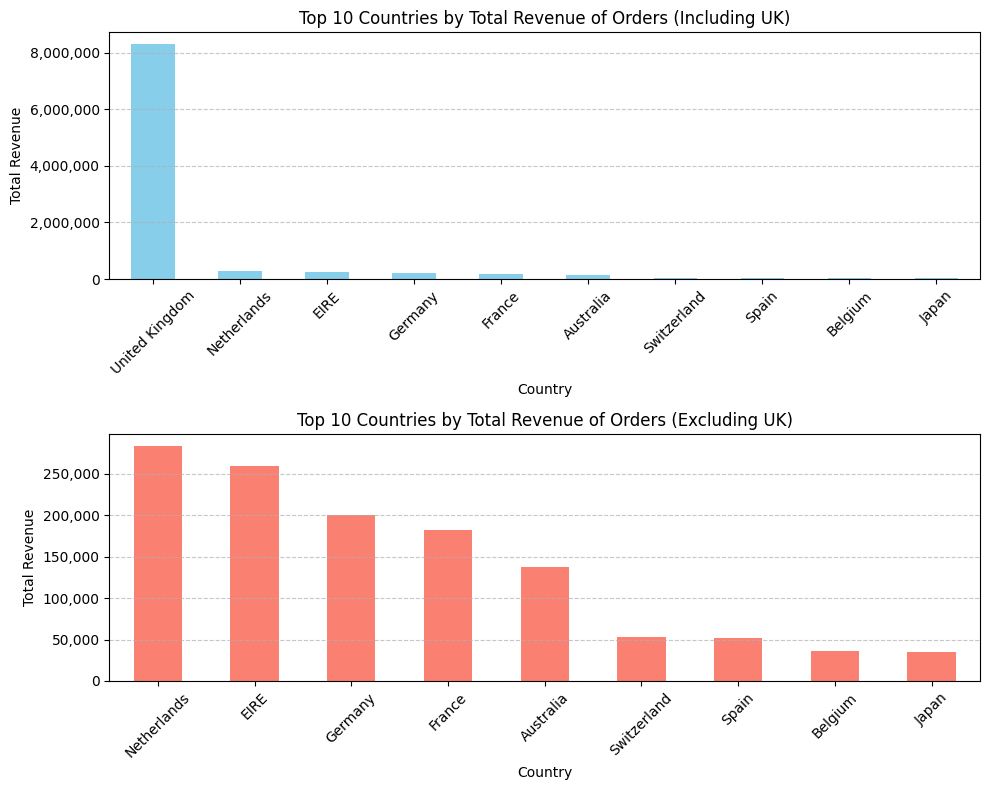

In [149]:
# Identify the top 10 countries by total revenue.
# The United Kingdom dominates the revenue, making it difficult to compare other countries on the same scale.
# To address this, we'll create a second chart that excludes the UK, allowing for better comparison among the remaining countries.

# Group data by country and calculate total revenue
df_country_revenue = df_transactions.groupby("Country")["TotalPrice"].sum()

# Get the top 10 countries including the United Kingdom
df_top_10_including_UK = df_country_revenue.sort_values(ascending=False).head(10)

# Get the top 10 countries excluding the United Kingdom
df_top_10_excluding_UK = df_top_10_including_UK.drop("United Kingdom", errors='ignore')
df_top_10_excluding_UK = df_top_10_excluding_UK.sort_values(ascending=False).head(10)

# Create two subplots for comparison
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# First subplot: Top 10 countries including the UK
df_top_10_including_UK.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Top 10 Countries by Total Revenue of Orders (Including UK)")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Total Revenue")
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter(integer_thousand_separator_formatter)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Second subplot: Top 10 countries excluding the UK
df_top_10_excluding_UK.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title("Top 10 Countries by Total Revenue of Orders (Excluding UK)")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Total Revenue")
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(integer_thousand_separator_formatter)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# - The United Kingdom overwhelmingly dominates the total revenue rankings, with over 8 million in sales, far surpassing all other countries.
# - When the UK is excluded, the Netherlands and EIRE emerge as the top performers, each generating around 250,000, highlighting a steep
#   drop-off in revenue compared to the UK.
# - This contrast emphasizes the UK's central role in overall sales performance and the relatively modest contributions of other top countries.

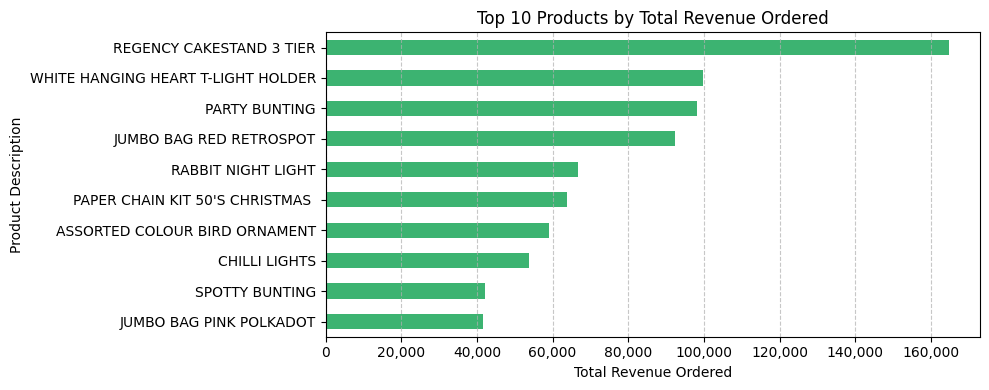

In [150]:
# Identify the top 10 products based on total revenue generated from orders.

# Calculate total revenue per product by summing 'TotalPrice' for each product description
df_product_revenue = df_transactions.groupby('Description')['TotalPrice'].sum()

# Select the top 10 products with the highest total revenue
df_top_products = df_product_revenue.sort_values(ascending=False).head(10)

# Create a horizontal bar chart to visualize the top 10 products
plt.figure(figsize=(10, 4))
df_top_products.plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 Products by Total Revenue Ordered")
plt.ylabel("Product Description")
plt.xlabel("Total Revenue Ordered")
plt.gca().xaxis.set_major_formatter(integer_thousand_separator_formatter)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis() # Display the highest revenue product at the top
plt.show()

# - The product "REGENCY CAKESTAND 3 TIER" stands out as the top revenue generator, significantly outperforming all other products with nearly
#   160,000 in total revenue.
# - A few other products, such as "WHITE HANGING HEART T-LIGHT HOLDER" and "PARTY BUNTING," also show strong performance, each generating
#   over 100,000 in revenue.
# - The steep drop in revenue after the top product highlights its exceptional popularity or pricing compared to the rest of the top 10.

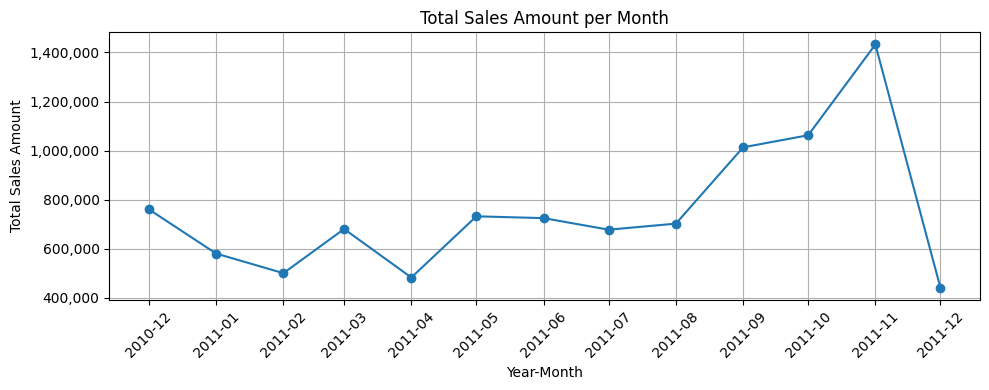

In [151]:
# Analyze revenue trends over time by aggregating total sales per month.

# Group data by Year-Month and calculate total revenue for each period
df_monthly_sales = df_transactions.groupby("YearMonth")["TotalPrice"].sum().reset_index()

# Convert the YearMonth period back to a datetime format for plotting
df_monthly_sales["YearMonth"] = df_monthly_sales["YearMonth"].dt.to_timestamp()

# Plot a line chart to visualize monthly revenue trends
plt.figure(figsize=(10, 4))
plt.plot(df_monthly_sales["YearMonth"], df_monthly_sales["TotalPrice"], marker='o') 
plt.title("Total Sales Amount per Month")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales Amount")
plt.gca().yaxis.set_major_formatter(integer_thousand_separator_formatter)
plt.grid(True)
plt.xticks(ticks=df_monthly_sales["YearMonth"], labels=df_monthly_sales["YearMonth"].dt.strftime('%Y-%m'), rotation=45)
plt.tight_layout()
plt.show()

# - From December 2010 to August 2011, the trend line shows a stagnation, indicating that total sales remained relatively stable during this period without
#   significant growth or decline.
# - In November 2011, there is a dramatic spike in the sales amount, reaching the maximum point on the chart at approximately 1,400,000. This suggests
#   an exceptional increase in sales activity during that month.
# - Following this peak, the trend line shows a sharp drop in December 2011, indicating that the surge was short-lived and possibly tied to a specific
#   event or seasonal factor.
# - An additional insight worth noting is that the maximum sales point in November 2011, just before Christmas in December, may suggest that
#   customers made early purchases for the holiday season, possibly due to promotions or stock concerns. This could explain the sharp drop in December,
#   as much of the seasonal demand had already been fulfilled the month prior.

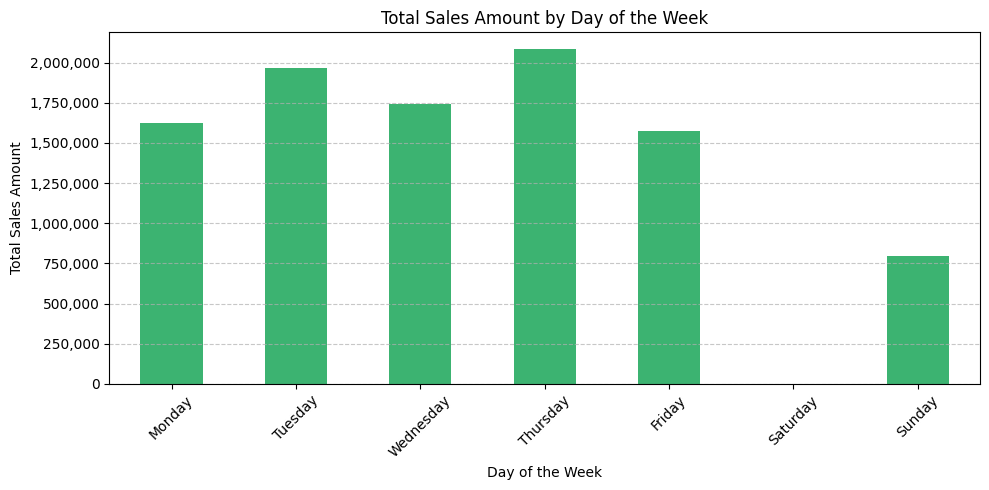

In [152]:
# Let's explore whether there's a pattern in total sales based on the day of the week.

# Group data by day of the week and calculate total revenue for each day
sales_by_day = df_transactions.groupby("DayOfWeek")["TotalPrice"].sum()

# Reorder the days to follow the natural weekly sequence
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day = sales_by_day.reindex(ordered_days)

# Plot a bar chart to visualize total sales by weekday
plt.figure(figsize=(10, 5))
sales_by_day.plot(kind='bar', color='mediumseagreen')
plt.title("Total Sales Amount by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales Amount")
plt.gca().yaxis.set_major_formatter(integer_thousand_separator_formatter)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# - Thursday stands out as the most profitable day, with total sales peaking at around 2,000,000.
# - Sunday records the lowest sales, just above 750,000, indicating a significant drop in customer activity.
# - Sales remain consistently strong on weekdays, especially from Monday to Friday, but decline sharply over the weekend, suggesting
#   a clear weekday-driven sales pattern.
# - The analysis shows that there are no transactions recorded on Saturdays in the dataset — not even invalid ones. This explains why
#   the total sales amount for Saturday is zero in the chart. This could be due to several reasons:
#     - The business might not operate or record sales on Saturdays.
#     - There could be a data collection or logging issue for that day.